<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model_2%EC%B0%A8_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/data.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,...,배당수익률,외국인 보유수량,외국인 지분율,외국인 한도수량,외국인 한도소진율,공매도 수량_거래량_전체,공매도 수량_순보유잔고수량,공매도 금액_거래대금_전체,공매도 금액_순보유잔고금액,등락
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,76138,0,0.00,76552,78621,75000,691041,51302865100,3726370000000,50630000,...,0.95,12069472,23.84,50630000,23.84,63513,171768,4688569400,12642124800,0
2023-01-03,73862,-2276,-2.99,76138,76966,72414,851220,60766095500,3614980000000,50630000,...,0.98,11960663,23.62,50630000,23.62,71153,188146,5085308900,13433624400,1
2023-01-04,74276,414,0.56,74069,74586,71586,555372,39384977200,3635230000000,50630000,...,0.97,11991757,23.69,50630000,23.69,52306,203048,3699538300,14578846400,0
2023-01-05,69103,-5173,-6.96,74379,74897,67862,1516452,103072000000,3382080000000,50630000,...,1.05,12008255,23.72,50630000,23.72,170021,318005,11533673100,21242734000,1
2023-01-06,69310,207,0.30,68276,70552,68069,528494,35514686400,3392210000000,50630000,...,1.04,11674802,23.06,50630000,23.06,24007,270666,1606169300,18134622000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,326000,21000,6.89,306500,328500,306500,336668,107690000000,14859500000000,45581161,...,0.55,19749349,43.33,45581161,43.33,473,13701,153055500,4466526000,0
2024-12-24,324000,-2000,-0.61,329000,330000,320500,179574,58184245500,14768300000000,45581161,...,0.56,19822787,43.49,45581161,43.49,195,13701,62993500,4439124000,0
2024-12-26,323500,-500,-0.15,324000,327000,316500,186277,60108541000,14745500000000,45581161,...,0.56,19778192,43.39,45581161,43.39,837,11551,270263000,3736748500,0


필요하면 추가로 넣어도 될듯? (ex. kospi, 방위 종목)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   종가              489 non-null    int64  
 1   대비              489 non-null    int64  
 2   등락률             489 non-null    float64
 3   시가              489 non-null    int64  
 4   고가              489 non-null    int64  
 5   저가              489 non-null    int64  
 6   거래량             489 non-null    int64  
 7   거래대금            489 non-null    int64  
 8   시가총액            489 non-null    int64  
 9   상장주식수           489 non-null    int64  
 10  EPS             489 non-null    int64  
 11  PER             489 non-null    float64
 12  선행 EPS          489 non-null    int64  
 13  선행 PER          489 non-null    float64
 14  BPS             489 non-null    int64  
 15  PBR             489 non-null    float64
 16  주당배당금           489 non-null    int64  
 17  배당수익률           

주가 그래프(2023/01/01 - 2024/12/31)   
index - 일자, 종가 column 필요

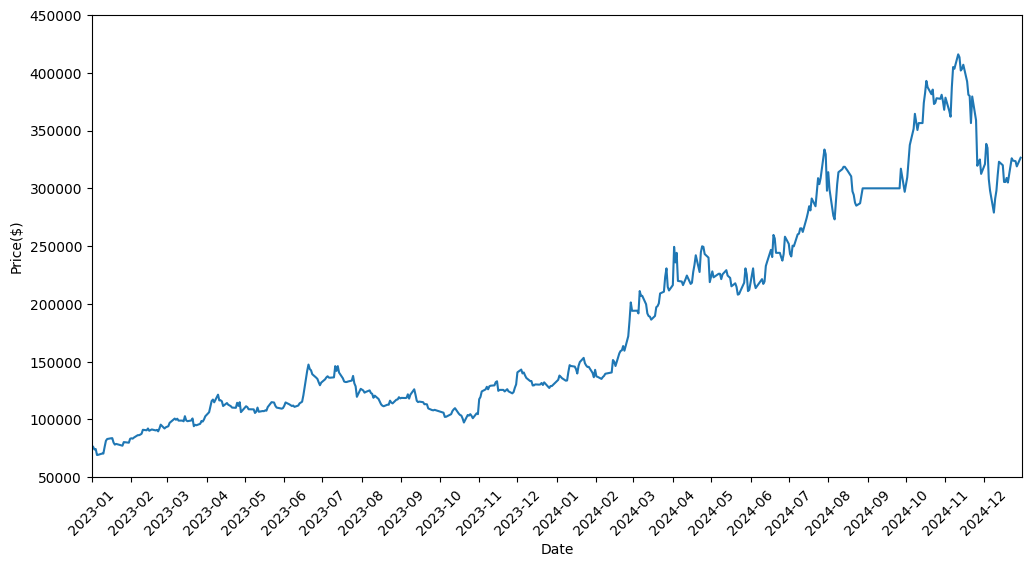

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'])

plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 범위 설정
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# x축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축 레이블 회전
plt.xticks(rotation=45)

plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

plt.show()

LSTM + 랜덤포레스트

1. 데이터 분리(섞기 X)   


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

train_size = int((len(X)-1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [5]:
print(len(y_train), len(y_test))

390 99


랜덤 포레스트를 통해 중요한 특징 찾기   
( feature_importances_ : 해당 피처가 클래스를 나누는데 얼마나 영향을 미쳤는지를 0 ~ 1로 표기하는 척도)    


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

important_features를 그래프로 나타내어 중요도 비교

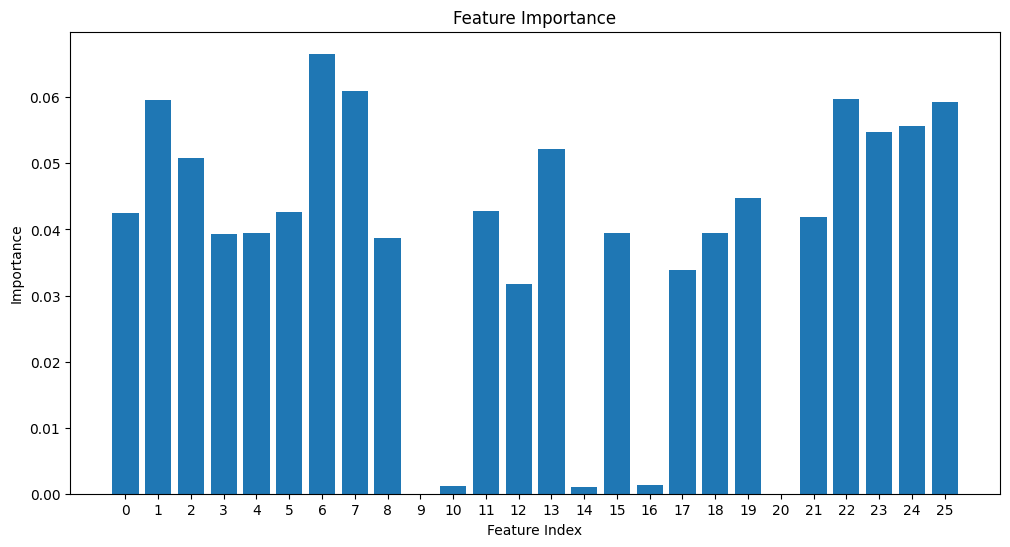

In [7]:
plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 추세 때문에 높은 연관성(예상)


위 Features들을 높은 순서대로 정렬한 뒤, 20위 까지 선택

In [8]:
top_features_indices = important_features.argsort()[-20:][::-1] # Feature 선택 수를 변경하고 싶을 시 변경 필요
X_selected = X_train.iloc[:,top_features_indices]

# random forest train 입력 데이터
X_selected_train = X_train.iloc[20:,top_features_indices]

X_selected_last_test = X_test.iloc[:,top_features_indices] # random forest 테스트 입력 데이터
X_selected.columns

Index(['거래량', '거래대금', '공매도 수량_거래량_전체', '대비', '공매도 금액_순보유잔고금액',
       '공매도 금액_거래대금_전체', '공매도 수량_순보유잔고수량', '선행 PER', '등락률', '외국인 지분율', 'PER',
       '저가', '종가', '외국인 한도소진율', '외국인 보유수량', 'PBR', '고가', '시가', '시가총액',
       '배당수익률'],
      dtype='object')

시가 총액, 상장 주식수, BPS(주당순자산가치), 주당배당금, 외국인 한도수량 은 거의 상관 없거나 아예 상관 없는걸로 보임

주식마다 sequence_length를 다르게 학습하여 가장 예측 결과 값이 좋은 걸로 선택하는 방법도 고려해볼 필요가 있음

In [9]:
X_test = X[train_size - 20:]
y_test = y[train_size - 20:]
X_selected_test = X_test.iloc[:,top_features_indices]
X_selected_test


,거래량,거래대금,공매도 수량_거래량_전체,대비,공매도 금액_순보유잔고금액,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,선행 PER,등락률,외국인 지분율,PER,저가,종가,외국인 한도소진율,외국인 보유수량,PBR,고가,시가,시가총액,배당수익률
일자,,,,,,,,,,,,,,,,,,,,
2024-07-05,240727,57921478000,528,-517,2503147500,127397000,10365,18.72,-0.21,36.39,15.00,245172,249828,36.39,18425013,3.46,252414,250345,12227100000000,0.75
2024-07-08,545599,136460000000,840,10344,2606797500,209470500,10365,19.49,4.14,36.42,15.62,249310,260172,36.42,18438501,3.60,261724,249828,12733400000000,0.72
2024-07-09,381822,95455454000,777,518,2611980000,195222000,10365,19.53,0.20,36.64,15.65,253966,260690,36.64,18551440,3.61,263276,260172,12758800000000,0.71
2024-07-10,1228430,323934000000,3127,4655,2658622500,833134000,10365,19.94,1.79,36.53,15.93,264310,265345,36.53,18494773,3.68,282931,266379,12986600000000,0.70
2024-07-11,471648,121836000000,95,0,2658366000,24499000,10364,19.94,0.00,36.74,15.93,263793,265345,36.74,18601425,3.68,273103,267414,12986600000000,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,336668,107690000000,473,21000,4466526000,153055500,13701,15.65,6.89,43.33,20.24,306500,326000,43.33,19749349,4.67,328500,306500,14859500000000,0.55
2024-12-24,179574,58184245500,195,-2000,4439124000,62993500,13701,15.56,-0.61,43.49,20.12,320500,324000,43.49,19822787,4.64,330000,329000,14768300000000,0.56
2024-12-26,186277,60108541000,837,-500,3736748500,270263000,11551,15.53,-0.15,43.39,20.09,316500,323500,43.39,19778192,4.64,327000,324000,14745500000000,0.56


In [10]:
X_selected_last_test.shape

(99, 20)

In [11]:
y_test

,등락
일자,
2024-07-05,1
2024-07-08,1
2024-07-09,1
2024-07-10,1
2024-07-11,0
...,...
2024-12-23,0
2024-12-24,0
2024-12-26,0


In [12]:
y_train

,등락
일자,
2023-01-02,0
2023-01-03,1
2023-01-04,0
2023-01-05,1
2023-01-06,1
...,...
2024-07-26,1
2024-07-29,0
2024-07-30,0


train 데이터 예측값 사용 위해 Callback 사용


In [13]:
import keras
from keras.callbacks import Callback

class PredictionCallback(keras.callbacks.Callback):
    def __init__(self, train_data, val_data):
        super().__init__()
        self.train_data = train_data  # (X_s_train, y_s_train)
        self.val_data = val_data  # (X_s_test, y_s_test)
        self.train_predictions = []
        self.val_predictions = []

    def on_epoch_end(self, epoch, logs=None):
        X_train, y_train = self.train_data
        X_val, y_val = self.val_data

        train_preds = self.model.predict(X_train, verbose=0)  # train, val 예측값 계산
        val_preds = self.model.predict(X_val, verbose=0)

        self.train_predictions.append(train_preds)
        self.val_predictions.append(val_preds)
        print(f"\nEpoch {epoch+1}: 예측값 예시 -> train : {train_preds[:5].flatten()}, val : {val_preds[:].flatten()}")


In [14]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_selected)

# 시퀀스 생성 함수
def create_sequences(data, label, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:(i+seq_length)]
        X.append(seq)
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

# 시퀀스 생성
X_s, y_s = create_sequences(scaled_data, y_train, seq_length=20)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, shuffle=False)

<ipython-input-14-72b3631d943d>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [15]:
print(len(X_train), len(y_train))
print(len(X_s), len(y_s))
print(len(X_s_train), len(y_s_train))
print(len(X_s_test), len(y_s_test))

390 390
370 370
296 296
74 74


결과적으로 전체에서 20개의 데이터가 빠진 형태   
총 예측값은 371개 생성 예정

In [16]:
print(y_s.shape)

(370,)


scaled_data_test

In [17]:
# 전체 테스트 데이터
scaled_data_test = scaler.fit_transform(X_selected_test)
X_lstm_test, _ = create_sequences(scaled_data_test, y_test, seq_length=20)

<ipython-input-14-72b3631d943d>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [18]:
scaled_data_test.shape

(119, 20)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
print(len(X_s_train))
print(len(y_s_train))

296
296


In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

prediction_callback = PredictionCallback((X_s_train, y_s_train),(X_s_test, y_s_test))

model.fit(X_s_train, y_s_train, epochs=10, batch_size=32, callbacks=[prediction_callback], validation_data=(X_s_test, y_s_test))

Epoch 1/10
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4702 - loss: 0.6975
Epoch 1: 예측값 예시 -> train : [0.5415643  0.54166716 0.5418302  0.54195076 0.54191947], val : [0.5246751  0.5247703  0.52443206 0.5240327  0.5232099  0.5227188
 0.5222531  0.52154005 0.5211498  0.52119654 0.52138954 0.5218601
 0.5225084  0.5244719  0.5266912  0.5291037  0.53137165 0.53335685
 0.535004   0.53653306 0.5379267  0.5391459  0.5400754  0.54093117
 0.5415937  0.5424313  0.5428748  0.5431559  0.5430685  0.543079
 0.5434367  0.54381394 0.5422198  0.5419649  0.5420613  0.5422371
 0.5424489  0.5426856  0.5429126  0.5426421  0.5422714  0.54178023
 0.5414664  0.5404063  0.5398238  0.53965867 0.53972536 0.5398431
 0.5400204  0.54013795 0.53980494 0.5396317  0.5393478  0.53952247
 0.53943056 0.5392887  0.5388969  0.5385913  0.5378888  0.5374033
 0.5372025  0.5365942  0.5359735  0.5352165  0.5347627  0.53449106
 0.53439957 0.5341896  0.53365546 0.533192   0.5328943  0.53221595
 0.53169173 0.53195524]
10/

In [22]:
train_predictions = prediction_callback.train_predictions
val_predictions = prediction_callback.val_predictions
len(train_predictions[0])

296

각 예측값을 더하고(lstm_train + lstm_val) random forest 훈련을 위한 데이터에 추가하기

In [23]:
lstm_pred_train = train_predictions[9]
lstm_pred_val = val_predictions[9]
lstm_pred_train = np.concatenate((lstm_pred_train, lstm_pred_val))

lstm결과가 기존 데이터 row 개수보다 20개 적으므로 train데이터에서 20개를 제외하고 학습 진행

In [24]:
X_selected_train

,거래량,거래대금,공매도 수량_거래량_전체,대비,공매도 금액_순보유잔고금액,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,선행 PER,등락률,외국인 지분율,PER,저가,종가,외국인 한도소진율,외국인 보유수량,PBR,고가,시가,시가총액,배당수익률
일자,,,,,,,,,,,,,,,,,,,,
2023-02-01,770969,62211600900,21904,414,9846530400,1766707000,121863,12.32,0.50,25.84,16.20,82759,83586,25.84,13081387,1.41,84724,84000,4090900000000,0.87
2023-02-02,633973,51044426100,23447,-310,9819148500,1886722700,121977,11.99,-0.37,25.84,16.14,82241,83276,25.84,13083408,1.41,84414,83897,4075720000000,0.87
2023-02-03,698632,56565426900,17394,931,9936009600,1401879900,122064,12.12,1.12,25.94,16.32,82345,84207,25.94,13131860,1.42,85138,82966,4121280000000,0.86
2023-02-06,1067542,88596187500,22511,2069,10249860000,1855465700,122900,12.42,2.46,26.22,16.72,81724,86276,26.22,13272702,1.46,87310,83069,4222540000000,0.84
2023-02-07,776864,64931953564,18079,0,10275547200,1509387300,123208,12.42,0.00,26.36,16.72,85241,86276,26.36,13344787,1.46,87931,86897,4222540000000,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,595132,176911000000,448,5172,4128255000,132341000,13830,23.36,1.70,37.55,18.54,300000,308793,37.55,19009142,4.28,312931,308276,15113100000000,0.60
2024-07-29,833331,260939000000,1806,24828,3342067500,574173000,10363,25.23,8.04,37.52,20.03,307241,333621,37.52,18997410,4.62,335172,315000,16328200000000,0.56
2024-07-30,1056943,338819000000,898,-4138,4486391000,290626500,14086,24.92,-1.24,37.52,19.78,320690,329483,37.52,18995527,4.56,341379,334138,16125700000000,0.57


In [25]:
X_selected_train['lstm_feature'] = lstm_pred_train
X_selected_train

,거래량,거래대금,공매도 수량_거래량_전체,대비,공매도 금액_순보유잔고금액,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,선행 PER,등락률,외국인 지분율,...,저가,종가,외국인 한도소진율,외국인 보유수량,PBR,고가,시가,시가총액,배당수익률,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2023-02-01,770969,62211600900,21904,414,9846530400,1766707000,121863,12.32,0.50,25.84,...,82759,83586,25.84,13081387,1.41,84724,84000,4090900000000,0.87,0.668695
2023-02-02,633973,51044426100,23447,-310,9819148500,1886722700,121977,11.99,-0.37,25.84,...,82241,83276,25.84,13083408,1.41,84414,83897,4075720000000,0.87,0.667494
2023-02-03,698632,56565426900,17394,931,9936009600,1401879900,122064,12.12,1.12,25.94,...,82345,84207,25.94,13131860,1.42,85138,82966,4121280000000,0.86,0.666278
2023-02-06,1067542,88596187500,22511,2069,10249860000,1855465700,122900,12.42,2.46,26.22,...,81724,86276,26.22,13272702,1.46,87310,83069,4222540000000,0.84,0.664830
2023-02-07,776864,64931953564,18079,0,10275547200,1509387300,123208,12.42,0.00,26.36,...,85241,86276,26.36,13344787,1.46,87931,86897,4222540000000,0.84,0.662968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,595132,176911000000,448,5172,4128255000,132341000,13830,23.36,1.70,37.55,...,300000,308793,37.55,19009142,4.28,312931,308276,15113100000000,0.60,0.478342
2024-07-29,833331,260939000000,1806,24828,3342067500,574173000,10363,25.23,8.04,37.52,...,307241,333621,37.52,18997410,4.62,335172,315000,16328200000000,0.56,0.476906
2024-07-30,1056943,338819000000,898,-4138,4486391000,290626500,14086,24.92,-1.24,37.52,...,320690,329483,37.52,18995527,4.56,341379,334138,16125700000000,0.57,0.475281


train_predictions에는 10 * len(X_s_train)예측값이 들어 있다.   
val_prections과 합치고, 기존 데이터 셋에 추가하는 과정 필요

In [26]:
lstm_feature_test = model.predict(X_lstm_test) # 전체 데이터셋에서 테스트 세트
lstm_feature_test
# 0.5 기준으로 0 과 1 예측

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.62463313],
       [0.6198208 ],
       [0.61494166],
       [0.6109417 ],
       [0.60696745],
       [0.60511637],
       [0.6048853 ],
       [0.6049764 ],
       [0.60529613],
       [0.60647714],
       [0.60788435],
       [0.6096059 ],
       [0.6115668 ],
       [0.61236274],
       [0.6139911 ],
       [0.6161558 ],
       [0.61895055],
       [0.6202837 ],
       [0.6204303 ],
       [0.6236752 ],
       [0.6281586 ],
       [0.63540465],
       [0.6418761 ],
       [0.6469705 ],
       [0.6512082 ],
       [0.6551359 ],
       [0.6590335 ],
       [0.66272515],
       [0.6656038 ],
       [0.6681363 ],
       [0.67012155],
       [0.67151207],
       [0.67210424],
       [0.67215246],
       [0.6722718 ],
       [0.6720731 ],
       [0.67162305],
       [0.6605812 ],
       [0.6462736 ],
       [0.6311568 ],
       [0.61201096],
       [0.59175783],
       [0.572401  ],
       [0.5552596 ],
       [0.5403765 ],
       [0.5272615 ],
       [0.5142283 ],
       [0.501

In [27]:
X_lstm_test.shape

(99, 20, 20)

In [28]:
lstm_feature_test.shape

(99, 1)

해결 방안   
1. 결측치로 놔주고 그 뒤의 값만 처리   
2. 어쩌지   
=> 훈련 데이터 끌어와서 해결

In [29]:
X_selected_last_test['lstm_feature'] = lstm_feature_test
X_selected_last_test

,거래량,거래대금,공매도 수량_거래량_전체,대비,공매도 금액_순보유잔고금액,공매도 금액_거래대금_전체,공매도 수량_순보유잔고수량,선행 PER,등락률,외국인 지분율,...,저가,종가,외국인 한도소진율,외국인 보유수량,PBR,고가,시가,시가총액,배당수익률,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-08-02,766410,226296000000,3824,-15000,4075767000,1115925000,14103,19.43,-4.78,37.07,...,298966,298966,37.07,18767024,4.14,316552,309310,14632100000000,0.62,0.624633
2024-08-05,1287553,352630000000,1576,-22759,3890190000,428449500,14570,17.79,-7.61,37.07,...,255517,276207,37.07,18766782,3.83,303103,294828,13518200000000,0.67,0.619821
2024-08-06,1341907,361531000000,390,-3104,4387680000,104407000,16620,17.59,-1.12,36.92,...,271034,273103,36.92,18692498,3.78,288621,281897,13366300000000,0.68,0.614942
2024-08-07,931915,256862000000,196,15518,4636422000,54947500,16618,18.59,5.68,36.52,...,272069,288621,36.52,18488435,4.00,294310,274138,14125800000000,0.65,0.610942
2024-08-08,880321,251473000000,227,15000,3073532000,65639000,10472,19.47,5.20,36.55,...,280345,303621,36.55,18506153,4.21,305172,289138,14859900000000,0.61,0.606967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,336668,107690000000,473,21000,4466526000,153055500,13701,15.65,6.89,43.33,...,306500,326000,43.33,19749349,4.67,328500,306500,14859500000000,0.55,0.477418
2024-12-24,179574,58184245500,195,-2000,4439124000,62993500,13701,15.56,-0.61,43.49,...,320500,324000,43.49,19822787,4.64,330000,329000,14768300000000,0.56,0.477821
2024-12-26,186277,60108541000,837,-500,3736748500,270263000,11551,15.53,-0.15,43.39,...,316500,323500,43.39,19778192,4.64,327000,324000,14745500000000,0.56,0.478483


In [30]:
y_rf_train = y_train.iloc[20:]
y_rf_train

,등락
일자,
2023-02-01,0
2023-02-02,1
2023-02-03,1
2023-02-06,1
2023-02-07,1
...,...
2024-07-26,1
2024-07-29,0
2024-07-30,0


In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_selected_train, y_rf_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf.predict(X_selected_last_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

random forest를 어떻게 학습할 것인가?   
문제점 : 훈련데이터의 lstm 결과 feature를 넣어야 되는데 이미 훈련데이터로 학습시켰기 때문에 높은 결과가 나올수밖에 없는 상황
1.

LSTM + Random Forest 예측 정확도

In [33]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test[20:], y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 40.40%


LSTM 예측 결과 정확도

In [34]:
lstm_pred = []*len(lstm_feature_test)
for i in range(len(lstm_feature_test)):
  if (i >= 0.5):
    lstm_pred.append(1)
  else:
    lstm_pred.append(0)

accuracy = accuracy_score(y_test[20:], lstm_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.63%
